In [24]:
import os

# 强制指定项目根目录
project_root = r'E:\AI\zhangzhou_.jpg'  # 使用原始字符串避免转义问题

# 构建图片路径
image_path = os.path.join(project_root)

# 验证路径
print(f"完整路径：{image_path}")
print(f"文件存在：{os.path.exists(image_path)}")

完整路径：E:\AI\zhangzhou_.jpg
文件存在：True


In [25]:
!pip install opencv-python matplotlib

In [26]:
import os
from pathlib import Path

# 方案1：绝对路径（推荐）
project_root = Path(r"E:\AI")
image_path = project_root  / "zhangzhou_.jpg"
# 验证
print(f"验证路径：{image_path}")
if image_path.exists():
    print("✅ 文件验证通过")
else:
    print("❌ 路径错误！请检查：")
    print(f"项目结构应为：")
    print(f"E:\\AI\\zhangzhou_.jpg")
    print(f"当前目录内容：{list(project_root.glob('*'))}")

验证路径：E:\AI\zhangzhou_.jpg
✅ 文件验证通过


成功加载图像: E:\AI\zhangzhou_.jpg, 尺寸: (221, 358, 3)


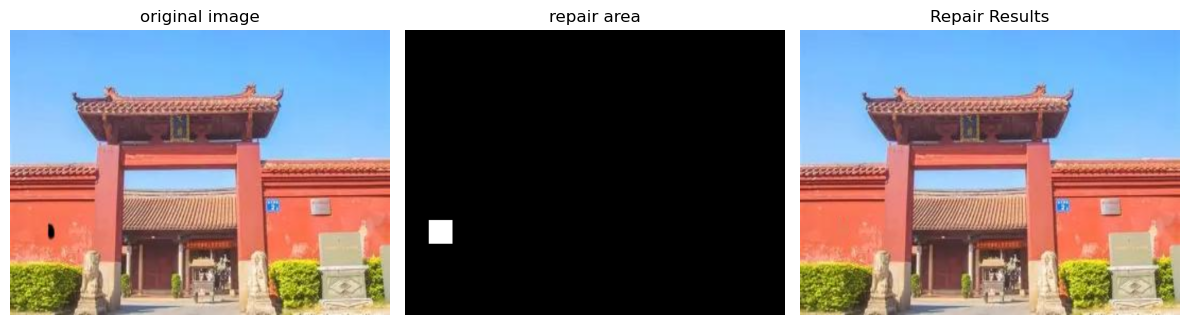


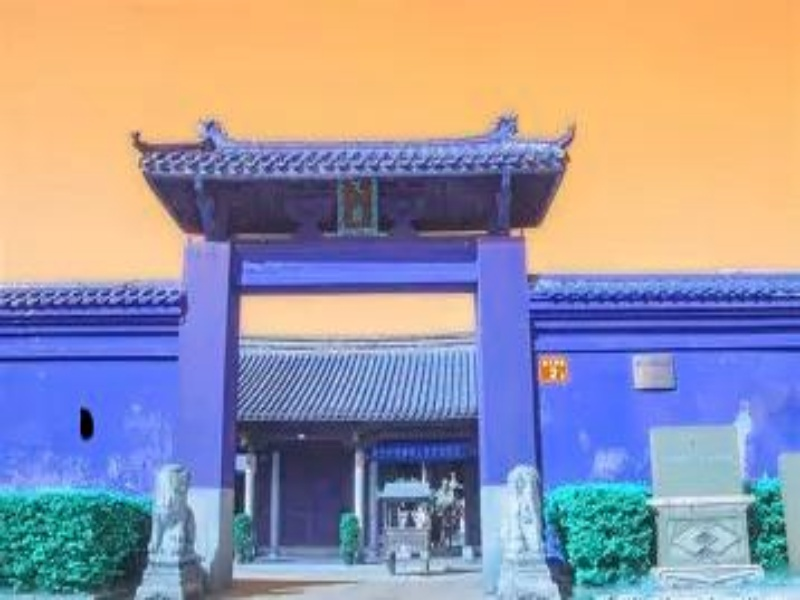


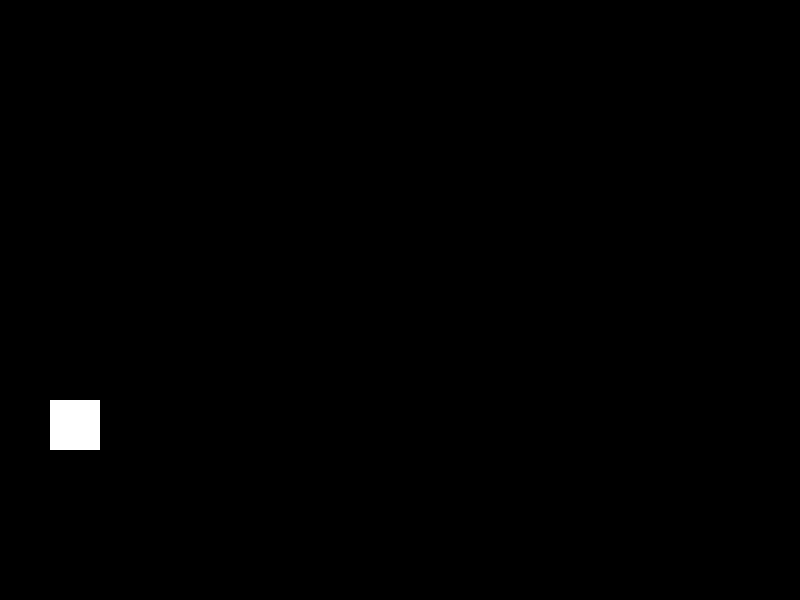


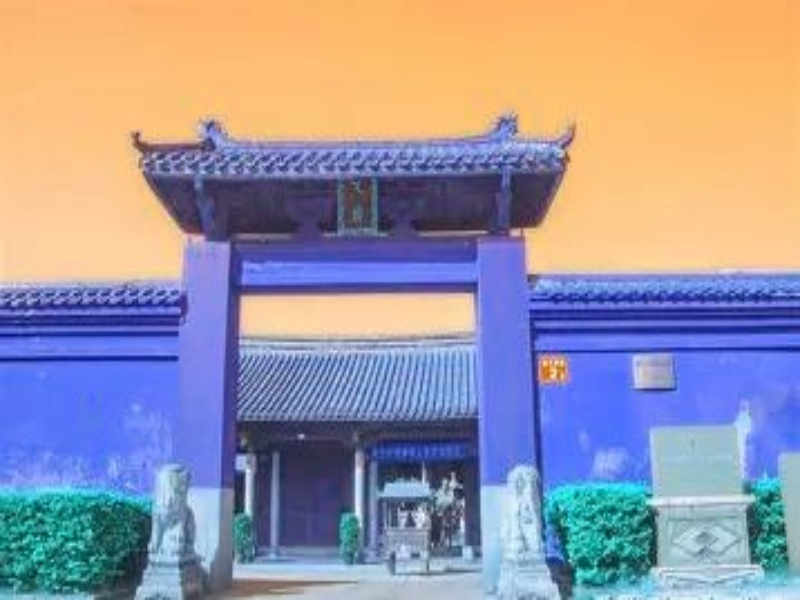

结果图像已保存: original.jpg, mask.png, restored.jpg


In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import base64 
from IPython.display import display, HTML
import os

# ===== 1. 安全读取图片 =====
def safe_read_image(file_name):
    # 确保使用相对路径
    image_path = 'E:\AI\zhangzhou_.jpg'
    
    try:
        # 检查文件是否存在
        if not os.path.exists(image_path):
            raise FileNotFoundError(f"图片文件 {image_path} 不存在")
        
        # 读取图像
        img = cv2.imread(image_path)
        if img is None:
            raise ValueError(f"无法读取图像 {image_path}，请检查文件格式")
        
        print(f"成功加载图像: {image_path}, 尺寸: {img.shape}")
        return img
    
    except Exception as e:
        print(f"读取图像时发生错误: {str(e)}")
        return None

# ===== 2. 主流程 =====
try:
    # 读取并预处理
    img = safe_read_image('zhangzhou_.jpg')  # 使用相对路径
    if img is None:
        raise RuntimeError("无法加载图像，无法继续处理")
    
    img = cv2.resize(img, (800, 600))
    
    # 手动创建掩膜（示例：修复左上角区域）
    mask = np.zeros(img.shape[:2], np.uint8)
    mask[400:450, 50:100] = 255  # 修改坐标范围匹配你的划痕位置
    
    # 修复图像
    restored = cv2.inpaint(img, mask, 10, cv2.INPAINT_NS)
    
    # ===== 1. Matplotlib 显示 =====
    plt.figure(figsize=(12, 6))
    
    plt.subplot(131)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('original image')
    plt.axis('off')
    
    plt.subplot(132)
    plt.imshow(mask, cmap='gray')
    plt.title('repair area')
    plt.axis('off')
    
    plt.subplot(133)
    plt.imshow(cv2.cvtColor(restored, cv2.COLOR_BGR2RGB))
    plt.title('Repair Results')
    plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('result_plot.png')  # 保存图表
    plt.show()

    # ===== 2. HTML 渲染显示 =====
    def display_image(title, image, is_mask=False):
        """将图像转换为 HTML 可显示的格式"""
        if is_mask or len(image.shape) == 2:  # 处理灰度图/掩码
            _, img_encoded = cv2.imencode('.png', image)
            mime_type = 'image/png'
        else:  # 处理彩色图
            # 转换为 RGB 格式
            rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            _, img_encoded = cv2.imencode('.jpg', rgb_image)
            mime_type = 'image/jpeg'
        
        img_base64 = base64.b64encode(img_encoded).decode('utf-8')
        html_content = f"<h3>{title}</h3><img src='data:{mime_type};base64,{img_base64}' style='max-width: 600px;'>"
        display(HTML(html_content))
    
    # 显示所有图像
    display_image("原始图片 (HTML渲染)", img)
    display_image("修复区域 (HTML渲染)", mask, is_mask=True)
    display_image("修复结果 (HTML渲染)", restored)
    
    # ===== 3. 保存结果图像 =====
    cv2.imwrite('original.jpg', img)
    cv2.imwrite('mask.png', mask)
    cv2.imwrite('restored.jpg', restored)
    print("结果图像已保存: original.jpg, mask.png, restored.jpg")

except Exception as e:
    print(f'🔥 发生错误: {str(e)}')